## Wstpne Przetwarzanie danych DEV

In [77]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [78]:
# Wczytanie danych oryginalnych
data = pd.read_csv('data/HCV-Egy-Data.csv')

In [79]:
# Wyświetlenie pierwszych 5 wierszy
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


In [80]:
# Wyświetlenie kolumn
data.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue & generalized bone ache', 'Jaundice',
       'Epigastric pain', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype='object')

In [81]:
# Zmiana nazw kolumn
data.columns=['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting','Headache ',
       'Diarrhea','Fatigue','Jaundice',
       'Epigastric_pain ', 'WBC','RBC','HGB', 'Plat','AST_1','ALT_1',
       'ALT_4', 'ALT_12','ALT_24','ALT_36','ALT_48','ALT_after_24w',
       'RNA_Base','RNA 4','RNA_12', 'RNA_EOT','RNA_EF',
       'Baseline_histological_Grading','Baselinehistological_staging']

In [82]:
# Wyświetlenie kolumn - TEST
data.columns

Index(['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea', 'Fatigue', 'Jaundice', 'Epigastric_pain ', 'WBC', 'RBC',
       'HGB', 'Plat', 'AST_1', 'ALT_1', 'ALT_4', 'ALT_12', 'ALT_24', 'ALT_36',
       'ALT_48', 'ALT_after_24w', 'RNA_Base', 'RNA 4', 'RNA_12', 'RNA_EOT',
       'RNA_EF', 'Baseline_histological_Grading',
       'Baselinehistological_staging'],
      dtype='object')

In [83]:
# Usuniecie białych znaków
data.columns = data.columns.str.strip()

In [84]:
# Wyświetlenie kolumn - TEST
data.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue', 'Jaundice', 'Epigastric_pain', 'WBC', 'RBC',
       'HGB', 'Plat', 'AST_1', 'ALT_1', 'ALT_4', 'ALT_12', 'ALT_24', 'ALT_36',
       'ALT_48', 'ALT_after_24w', 'RNA_Base', 'RNA 4', 'RNA_12', 'RNA_EOT',
       'RNA_EF', 'Baseline_histological_Grading',
       'Baselinehistological_staging'],
      dtype='object')

In [85]:
# Informacje o danych
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1385 non-null   int64  
 1   Gender                         1385 non-null   int64  
 2   BMI                            1385 non-null   int64  
 3   Fever                          1385 non-null   int64  
 4   Nausea/Vomting                 1385 non-null   int64  
 5   Headache                       1385 non-null   int64  
 6   Diarrhea                       1385 non-null   int64  
 7   Fatigue                        1385 non-null   int64  
 8   Jaundice                       1385 non-null   int64  
 9   Epigastric_pain                1385 non-null   int64  
 10  WBC                            1385 non-null   int64  
 11  RBC                            1385 non-null   float64
 12  HGB                            1385 non-null   i

In [86]:
# Statystyki anych
data.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue,Jaundice,Epigastric_pain,...,ALT_36,ALT_48,ALT_after_24w,RNA_Base,RNA 4,RNA_12,RNA_EOT,RNA_EF,Baseline_histological_Grading,Baselinehistological_staging
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000


### Brakujace wartosci

In [87]:
# Sprawdzenie brakujących danych
data.isnull().sum().sum()

np.int64(0)

### Zmiana nazw kolumn

In [88]:
# kategoryzacja niektorych zmiennych
# zmiana z int na string
data_cut = data[['Gender', 'Fever', 'Nausea/Vomting', 'Headache', 'Diarrhea', 'Fatigue', 'Jaundice', 'Epigastric_pain', 'Baselinehistological_staging']]

In [89]:
# Wyświetlenie pierwszych 5 wierszy danych do kategoryzacji
data_cut.head()

,Gender,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue,Jaundice,Epigastric_pain,Baselinehistological_staging
0,1,2,1,1,1,2,2,2,2
1,1,1,2,2,1,2,2,1,2
2,1,2,2,2,2,1,1,1,4
3,2,1,2,1,2,1,2,1,3
4,1,1,1,2,1,2,2,2,1


In [90]:
# zmiana typu danych na kategoryczne
data_cut = data_cut.astype('category')

In [91]:
# Wyświetlenie informacji o danych do kategoryzacji
data_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Gender                        1385 non-null   category
 1   Fever                         1385 non-null   category
 2   Nausea/Vomting                1385 non-null   category
 3   Headache                      1385 non-null   category
 4   Diarrhea                      1385 non-null   category
 5   Fatigue                       1385 non-null   category
 6   Jaundice                      1385 non-null   category
 7   Epigastric_pain               1385 non-null   category
 8   Baselinehistological_staging  1385 non-null   category
dtypes: category(9)
memory usage: 13.5 KB


In [92]:
# 'Gender' zmiana cyfr na stringi
data_cut['Gender'].replace([1,2],['Male', 'Famale'],inplace=True)
data_cut['Gender']

0         Male
1         Male
2         Male
3       Famale
4         Male
         ...  
1380      Male
1381      Male
1382      Male
1383      Male
1384    Famale
Name: Gender, Length: 1385, dtype: category
Categories (2, object): ['Male', 'Famale']

In [93]:
# zamiana pozostałych zmiennych na stringi
data_cut['Fever'].replace([1,2],['Absent','Present'],inplace=True)
data_cut['Nausea/Vomting'].replace([1,2],['Absent','Present'],inplace=True)
data_cut['Headache'].replace([1,2],['Absent','Present'],inplace=True)
data_cut['Fatigue'].replace([1,2],['Absent','Present'],inplace=True)
data_cut['Jaundice'].replace([1,2],['Absent','Present'],inplace=True)
data_cut['Diarrhea'].replace([1,2],['Absent','Present'],inplace=True)
data_cut['Epigastric_pain'].replace([1,2],['Absent','Present'],inplace=True)

data_cut['Baselinehistological_staging'].replace([1,2,3,4],['Portal Fibrosis','Few Septa','Many Septa','Cirrhosis'],inplace=True)

In [94]:
# Wyświetlenie pierwszych 5 wierszy danych po kategoryzacji
data_cut.head()

,Gender,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue,Jaundice,Epigastric_pain,Baselinehistological_staging
0,Male,Present,Absent,Absent,Absent,Present,Present,Present,Few Septa
1,Male,Absent,Present,Present,Absent,Present,Present,Absent,Few Septa
2,Male,Present,Present,Present,Present,Absent,Absent,Absent,Cirrhosis
3,Famale,Absent,Present,Absent,Present,Absent,Present,Absent,Many Septa
4,Male,Absent,Absent,Present,Absent,Present,Present,Present,Portal Fibrosis


### Zbalansowanie zbioru danych

In [95]:
# zbalansowanie zmiennej 'Baselinehistological_staging'
data_cut['Baselinehistological_staging'].value_counts()

Baselinehistological_staging
Cirrhosis          362
Many Septa         355
Portal Fibrosis    336
Few Septa          332
Name: count, dtype: int64

### Podsumowanie

Kategoryzacja danych (data_cut) do wizualziji, przyda sie for sure,
- Usuwanie Otlinerow,
- Normalizacja / Standaryzacja
- SMOTE
- zapis do nowego pliku
- usuwanie dupliaktów
- 

## Dalsze przetwarzanie danych

In [96]:
# impoty
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [97]:
# Wczytanie danych
dataBase = data

In [98]:
# Wyświetlenie pierwszych 5 wierszy
dataBase.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue,Jaundice,Epigastric_pain,...,ALT_36,ALT_48,ALT_after_24w,RNA_Base,RNA 4,RNA_12,RNA_EOT,RNA_EF,Baseline_histological_Grading,Baselinehistological_staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


In [ ]:
# ???
dataBase['Baselinehistological_staging'].replace([1],[0],inplace=True)
dataBase['Baselinehistological_staging'].replace([2],[1],inplace=True)
dataBase['Baselinehistological_staging'].replace([3],[1],inplace=True)
dataBase['Baselinehistological_staging'].replace([4],[1],inplace=True)

# wyswietlenie etykiety do przewidzenia
dataBase['Baselinehistological_staging']

0       1
1       1
2       1
3       1
4       0
       ..
1380    1
1381    1
1382    1
1383    1
1384    1
Name: Baselinehistological_staging, Length: 1385, dtype: int64

In [101]:
# Standaryzacja danych
standard_sc = preprocessing.StandardScaler()

In [ ]:
# Podział danych na zbiór treningowy i testowy p1

# X - dane bez etykiety
X = dataBase.drop(['Baselinehistological_staging'],axis=1)

# y - etykieta, jednynie kolumna 'Baselinehistological_staging'
y = dataBase["Baselinehistological_staging"]

In [103]:
# Podział danych na zbiór treningowy i testowy p2
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

### Rozdział 1 - TreeClassifier

In [124]:

# for x in [standard_sc]:
#     resultado = []
#     scaler = x.fit(X)
#     X_new = x.transform(X)
    
#     tree = DecisionTreeClassifier(max_depth=25,random_state=42)
#     tree.fit(X_new,y)
#     y_pred = tree.predict(X_new)
    
#     # Metryka F1
#     f1sc=f1_score(y, y_pred, average='weighted')
    
#     # 
#     rauc=(y, y_pred)
#     resultado.append(f1sc)
#     print("The scaling used--->", x)
#     print("f1 according to the type of strategy:", f1sc)
    

tree = DecisionTreeClassifier(max_depth=25,random_state=42)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
score = tree.score(X_test,y_test)

f1sc=f1_score(y_test, y_pred, average='weighted')

rauc=(y, y_pred)


In [125]:
score

0.6225961538461539

In [126]:
confusion_matrix(y_test, y_pred)

array([[ 24,  77],
       [ 80, 235]])

### SMOTE, OverSampling & UnderSampling

In [135]:
X_train.shape

(1468, 28)

In [136]:
X_test.shape

(416, 28)

In [130]:
# Dbanie o zbalansowanie danych w zbiorach
over = SMOTE()
overs = RandomOverSampler()
under = RandomUnderSampler()
# steps = [('o', over), ('os', overs),('u',under)]
steps = [('o', over)]
pipeline = Pipeline(steps=steps)

X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [133]:
X_train.shape

(1468, 28)

In [134]:
X_test.shape

(416, 28)

In [137]:
# Standaryzacja danych
X_train = standard_sc.fit_transform(X_train)
X_test = standard_sc.transform(X_test)

In [ ]:
X_test

In [138]:
def confusion(y_test,y_test_pred,X):
    names=['Non Hepatitis','Hepatitis']
    cm=confusion_matrix(y_test,y_test_pred)
    f,ax=plt.subplots(figsize=(10,10))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.title(X, size = 25)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

## Rozdział 2 - RandomForest

In [139]:
# Dodac RandomizedSearchCV i Optuna
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)
pred = RF.predict(X_test)
score = RF.score(X_test,y_test)

In [140]:
score

0.7163461538461539

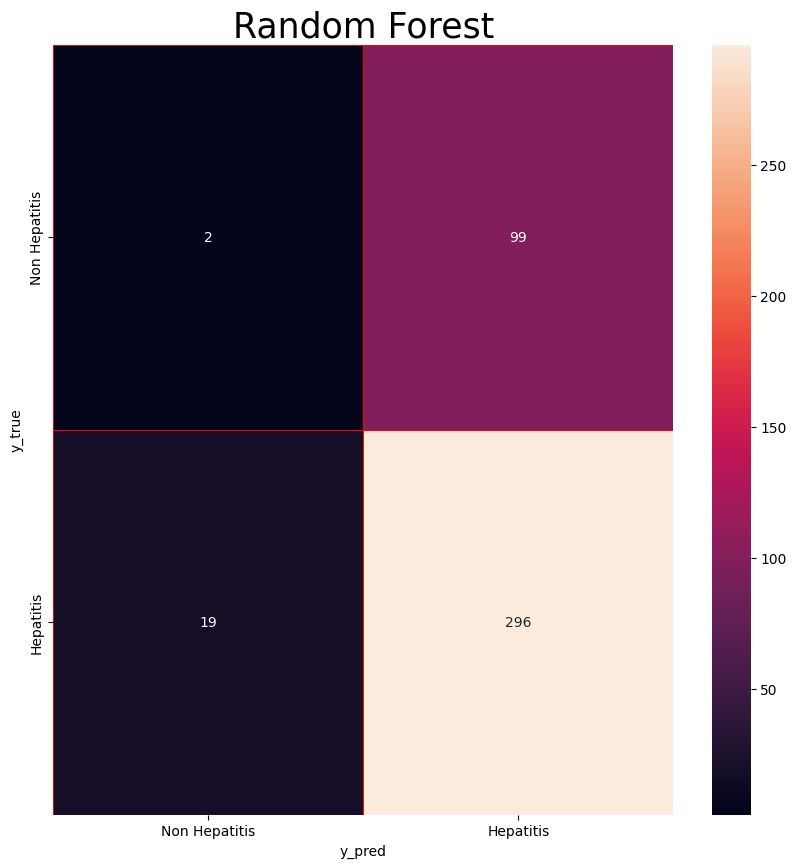

In [141]:
confusion(y_test,pred,'Random Forest')

<Axes: >

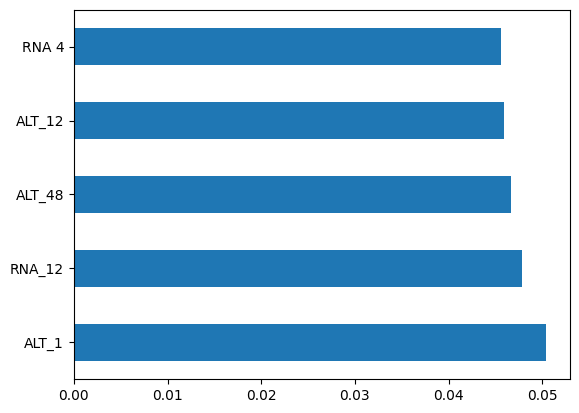

In [142]:
# korelacja na wynik
feat_importances = pd.Series(RF.feature_importances_, index=data.drop('Baselinehistological_staging',axis=1).columns)
feat_importances.nlargest(5).plot(kind='barh')

## Rozdział 2 - EGBoost

In [143]:
gbm = XGBClassifier(verbosity=1)
params_xgb = {
        "n_estimators":[500,1000,1500],
        "learning_rate":[0.1,0.3,0.6],
        'gpu_id': [0],
        "predictor":["gpu_predictor"],
        'tree_method': ['gpu_hist'],
        "updater":["grow_gpu_hist"],
        "sampling_method":["gradient_based"],
        "updater":["grow_gpu_hist"]
}

In [144]:
# XGBoost dla GridSearchCV - zamienic na RandomizedSearchCV i Optuna
model_xgb = GridSearchCV(gbm,param_grid=params_xgb, cv=5,n_jobs=-1)
model_xgb.fit(X_train,y_train)

print("Best params: "+str(model_xgb.best_params_))
print("Best Score: "+str(model_xgb.best_score_)+'\n')

scores = pd.DataFrame(model_xgb.cv_results_)
scores.sort_values(by="rank_test_score")

y_train_pred_xgb = model_xgb.predict(X_train)
y_test_pred_xgb = model_xgb.predict(X_test)

print(classification_report(y_test, y_test_pred_xgb))

confusion(y_test,y_test_pred_xgb,"XGB")

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0

ValueError: 
All the 45 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/sklearn.py", line 1531, in fit
    self._Booster = train(
                    ^^^^^^
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 2100, in update
    _check_call(
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:21:29] /Users/runner/work/xgboost/xgboost/src/tree/tree_updater.cc:20: Unknown tree updater grow_gpu_hist
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000114b38428 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x0000000114e14c24 xgboost::TreeUpdater::Create(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>> const&, xgboost::Context const*, xgboost::ObjInfo const*) + 148
  [bt] (2) 3   libxgboost.dylib                    0x0000000114d04768 xgboost::gbm::GBTree::Configure(std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>>, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>>>> const&) + 2156
  [bt] (3) 4   libxgboost.dylib                    0x0000000114d2354c xgboost::LearnerConfiguration::Configure() + 1272
  [bt] (4) 5   libxgboost.dylib                    0x0000000114d2379c xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 128
  [bt] (5) 6   libxgboost.dylib                    0x0000000114b5ab34 XGBoosterUpdateOneIter + 144
  [bt] (6) 7   libffi.dylib                        0x00000001abd11050 ffi_call_SYSV + 80
  [bt] (7) 8   libffi.dylib                        0x00000001abd19ae0 ffi_call_int + 1212
  [bt] (8) 9   _ctypes.cpython-312-darwin.so       0x000000010312b9d0 _ctypes_callproc + 808



--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/sklearn.py", line 1531, in fit
    self._Booster = train(
                    ^^^^^^
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 2100, in update
    _check_call(
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:21:29] /Users/runner/work/xgboost/xgboost/src/tree/tree_updater.cc:20: Unknown tree updater grow_gpu_hist
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000131068428 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x0000000131344c24 xgboost::TreeUpdater::Create(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>> const&, xgboost::Context const*, xgboost::ObjInfo const*) + 148
  [bt] (2) 3   libxgboost.dylib                    0x0000000131234768 xgboost::gbm::GBTree::Configure(std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>>, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>>>> const&) + 2156
  [bt] (3) 4   libxgboost.dylib                    0x000000013125354c xgboost::LearnerConfiguration::Configure() + 1272
  [bt] (4) 5   libxgboost.dylib                    0x000000013125379c xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 128
  [bt] (5) 6   libxgboost.dylib                    0x000000013108ab34 XGBoosterUpdateOneIter + 144
  [bt] (6) 7   libffi.dylib                        0x00000001abd11050 ffi_call_SYSV + 80
  [bt] (7) 8   libffi.dylib                        0x00000001abd19ae0 ffi_call_int + 1212
  [bt] (8) 9   _ctypes.cpython-312-darwin.so       0x00000001055039d0 _ctypes_callproc + 808



--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/sklearn.py", line 1531, in fit
    self._Booster = train(
                    ^^^^^^
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 2100, in update
    _check_call(
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:21:29] /Users/runner/work/xgboost/xgboost/src/tree/tree_updater.cc:20: Unknown tree updater grow_gpu_hist
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000010ee14428 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x000000010f0f0c24 xgboost::TreeUpdater::Create(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>> const&, xgboost::Context const*, xgboost::ObjInfo const*) + 148
  [bt] (2) 3   libxgboost.dylib                    0x000000010efe0768 xgboost::gbm::GBTree::Configure(std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>>, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>>>> const&) + 2156
  [bt] (3) 4   libxgboost.dylib                    0x000000010efff54c xgboost::LearnerConfiguration::Configure() + 1272
  [bt] (4) 5   libxgboost.dylib                    0x000000010efff79c xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 128
  [bt] (5) 6   libxgboost.dylib                    0x000000010ee36b34 XGBoosterUpdateOneIter + 144
  [bt] (6) 7   libffi.dylib                        0x00000001abd11050 ffi_call_SYSV + 80
  [bt] (7) 8   libffi.dylib                        0x00000001abd19ae0 ffi_call_int + 1212
  [bt] (8) 9   _ctypes.cpython-312-darwin.so       0x00000001054579d0 _ctypes_callproc + 808



--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/sklearn.py", line 1531, in fit
    self._Booster = train(
                    ^^^^^^
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 2100, in update
    _check_call(
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:21:29] /Users/runner/work/xgboost/xgboost/src/tree/tree_updater.cc:20: Unknown tree updater grow_gpu_hist
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x00000001208ec428 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x0000000120bc8c24 xgboost::TreeUpdater::Create(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>> const&, xgboost::Context const*, xgboost::ObjInfo const*) + 148
  [bt] (2) 3   libxgboost.dylib                    0x0000000120ab8768 xgboost::gbm::GBTree::Configure(std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>>, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>>>> const&) + 2156
  [bt] (3) 4   libxgboost.dylib                    0x0000000120ad754c xgboost::LearnerConfiguration::Configure() + 1272
  [bt] (4) 5   libxgboost.dylib                    0x0000000120ad779c xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 128
  [bt] (5) 6   libxgboost.dylib                    0x000000012090eb34 XGBoosterUpdateOneIter + 144
  [bt] (6) 7   libffi.dylib                        0x00000001abd11050 ffi_call_SYSV + 80
  [bt] (7) 8   libffi.dylib                        0x00000001abd19ae0 ffi_call_int + 1212
  [bt] (8) 9   _ctypes.cpython-312-darwin.so       0x0000000105c1f9d0 _ctypes_callproc + 808



--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/sklearn.py", line 1531, in fit
    self._Booster = train(
                    ^^^^^^
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 2100, in update
    _check_call(
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:21:29] /Users/runner/work/xgboost/xgboost/src/tree/tree_updater.cc:20: Unknown tree updater grow_gpu_hist
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000011ae38428 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x000000011b114c24 xgboost::TreeUpdater::Create(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>> const&, xgboost::Context const*, xgboost::ObjInfo const*) + 148
  [bt] (2) 3   libxgboost.dylib                    0x000000011b004768 xgboost::gbm::GBTree::Configure(std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>>, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>>>> const&) + 2156
  [bt] (3) 4   libxgboost.dylib                    0x000000011b02354c xgboost::LearnerConfiguration::Configure() + 1272
  [bt] (4) 5   libxgboost.dylib                    0x000000011b02379c xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 128
  [bt] (5) 6   libxgboost.dylib                    0x000000011ae5ab34 XGBoosterUpdateOneIter + 144
  [bt] (6) 7   libffi.dylib                        0x00000001abd11050 ffi_call_SYSV + 80
  [bt] (7) 8   libffi.dylib                        0x00000001abd19ae0 ffi_call_int + 1212
  [bt] (8) 9   _ctypes.cpython-312-darwin.so       0x00000001014eb9d0 _ctypes_callproc + 808



--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/sklearn.py", line 1531, in fit
    self._Booster = train(
                    ^^^^^^
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 2100, in update
    _check_call(
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:21:29] /Users/runner/work/xgboost/xgboost/src/tree/tree_updater.cc:20: Unknown tree updater grow_gpu_hist
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000010b744428 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x000000010ba20c24 xgboost::TreeUpdater::Create(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>> const&, xgboost::Context const*, xgboost::ObjInfo const*) + 148
  [bt] (2) 3   libxgboost.dylib                    0x000000010b910768 xgboost::gbm::GBTree::Configure(std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>>, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>>>> const&) + 2156
  [bt] (3) 4   libxgboost.dylib                    0x000000010b92f54c xgboost::LearnerConfiguration::Configure() + 1272
  [bt] (4) 5   libxgboost.dylib                    0x000000010b92f79c xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 128
  [bt] (5) 6   libxgboost.dylib                    0x000000010b766b34 XGBoosterUpdateOneIter + 144
  [bt] (6) 7   libffi.dylib                        0x00000001abd11050 ffi_call_SYSV + 80
  [bt] (7) 8   libffi.dylib                        0x00000001abd19ae0 ffi_call_int + 1212
  [bt] (8) 9   _ctypes.cpython-312-darwin.so       0x00000001019cf9d0 _ctypes_callproc + 808



--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/sklearn.py", line 1531, in fit
    self._Booster = train(
                    ^^^^^^
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 2100, in update
    _check_call(
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:21:29] /Users/runner/work/xgboost/xgboost/src/tree/tree_updater.cc:20: Unknown tree updater grow_gpu_hist
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000113788428 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x0000000113a64c24 xgboost::TreeUpdater::Create(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>> const&, xgboost::Context const*, xgboost::ObjInfo const*) + 148
  [bt] (2) 3   libxgboost.dylib                    0x0000000113954768 xgboost::gbm::GBTree::Configure(std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>>, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>>>> const&) + 2156
  [bt] (3) 4   libxgboost.dylib                    0x000000011397354c xgboost::LearnerConfiguration::Configure() + 1272
  [bt] (4) 5   libxgboost.dylib                    0x000000011397379c xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 128
  [bt] (5) 6   libxgboost.dylib                    0x00000001137aab34 XGBoosterUpdateOneIter + 144
  [bt] (6) 7   libffi.dylib                        0x00000001abd11050 ffi_call_SYSV + 80
  [bt] (7) 8   libffi.dylib                        0x00000001abd19ae0 ffi_call_int + 1212
  [bt] (8) 9   _ctypes.cpython-312-darwin.so       0x000000010234f9d0 _ctypes_callproc + 808



--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/sklearn.py", line 1531, in fit
    self._Booster = train(
                    ^^^^^^
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/training.py", line 181, in train
    bst.update(dtrain, iteration=i, fobj=obj)
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 2100, in update
    _check_call(
  File "/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/xgboost/core.py", line 284, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [15:21:29] /Users/runner/work/xgboost/xgboost/src/tree/tree_updater.cc:20: Unknown tree updater grow_gpu_hist
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000128804428 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x0000000128ae0c24 xgboost::TreeUpdater::Create(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>> const&, xgboost::Context const*, xgboost::ObjInfo const*) + 148
  [bt] (2) 3   libxgboost.dylib                    0x00000001289d0768 xgboost::gbm::GBTree::Configure(std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>>, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>>>>> const&) + 2156
  [bt] (3) 4   libxgboost.dylib                    0x00000001289ef54c xgboost::LearnerConfiguration::Configure() + 1272
  [bt] (4) 5   libxgboost.dylib                    0x00000001289ef79c xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 128
  [bt] (5) 6   libxgboost.dylib                    0x0000000128826b34 XGBoosterUpdateOneIter + 144
  [bt] (6) 7   libffi.dylib                        0x00000001abd11050 ffi_call_SYSV + 80
  [bt] (7) 8   libffi.dylib                        0x00000001abd19ae0 ffi_call_int + 1212
  [bt] (8) 9   _ctypes.cpython-312-darwin.so       0x00000001031eb9d0 _ctypes_callproc + 808




## Rozdział 3 - MLP

/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multi

Best params: {'activation': 'tanh', 'hidden_layer_sizes': 256, 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam', 'warm_start': True}
Best Score: 0.864446392053754

              precision    recall  f1-score   support

           0       0.22      0.16      0.18       101
           1       0.75      0.82      0.78       315

    accuracy                           0.66       416
   macro avg       0.49      0.49      0.48       416
weighted avg       0.62      0.66      0.64       416



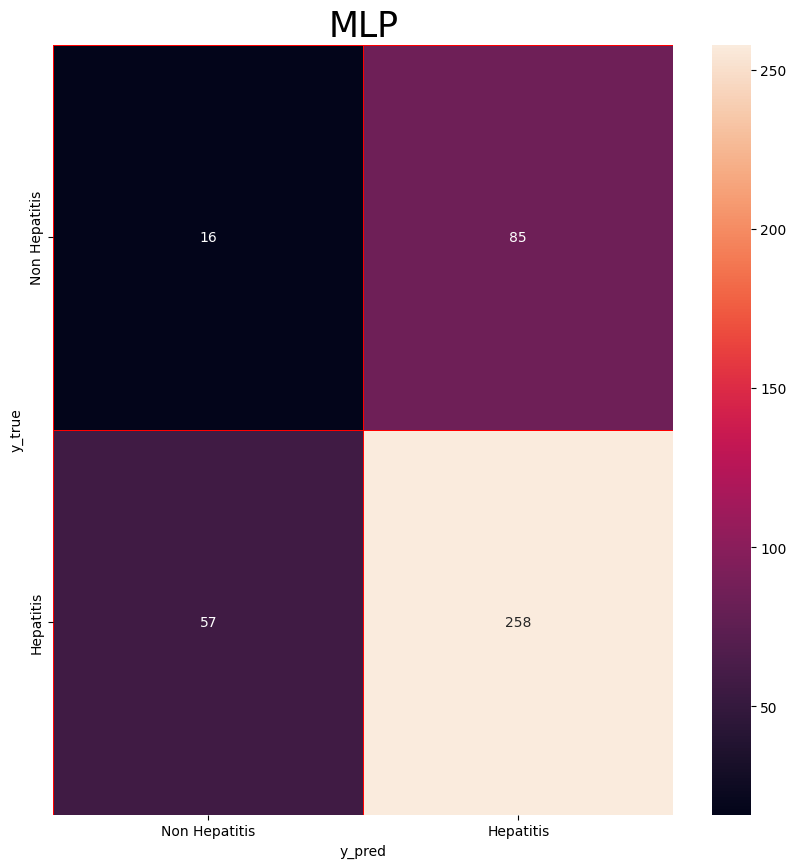

In [145]:
clf = MLPClassifier(random_state=42)
params_MLP = {
        "hidden_layer_sizes":[64,128,256],
        "activation":["identity", "logistic", "tanh", "relu"],
        'solver': ["lbfgs", "sgd", "adam"],
        "learning_rate":["constant", "invscaling", "adaptive"],
        'max_iter': [100,200],
        "warm_start":[True]
}

model_MLP = GridSearchCV(clf,param_grid=params_MLP, cv=3,n_jobs=-1)
model_MLP.fit(X_train,y_train)

print("Best params: "+str(model_MLP.best_params_))
print("Best Score: "+str(model_MLP.best_score_)+'\n')

scores = pd.DataFrame(model_MLP.cv_results_)
scores.sort_values(by="rank_test_score")

y_train_pred_MLP = model_MLP.predict(X_train)
y_test_pred_MLP = model_MLP.predict(X_test)

print(classification_report(y_test, y_test_pred_MLP))

confusion(y_test,y_test_pred_MLP,"MLP")

/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/michaelbak/Desktop/UNIVERSITY/niby_inzynier/theasis/thesis/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multi

Best params: {'activation': 'tanh', 'hidden_layer_sizes': 256, 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam', 'warm_start': True}
Best Score: 0.864446392053754

              precision    recall  f1-score   support

           0       0.22      0.16      0.18       101
           1       0.75      0.82      0.78       315

    accuracy                           0.66       416
   macro avg       0.49      0.49      0.48       416
weighted avg       0.62      0.66      0.64       416



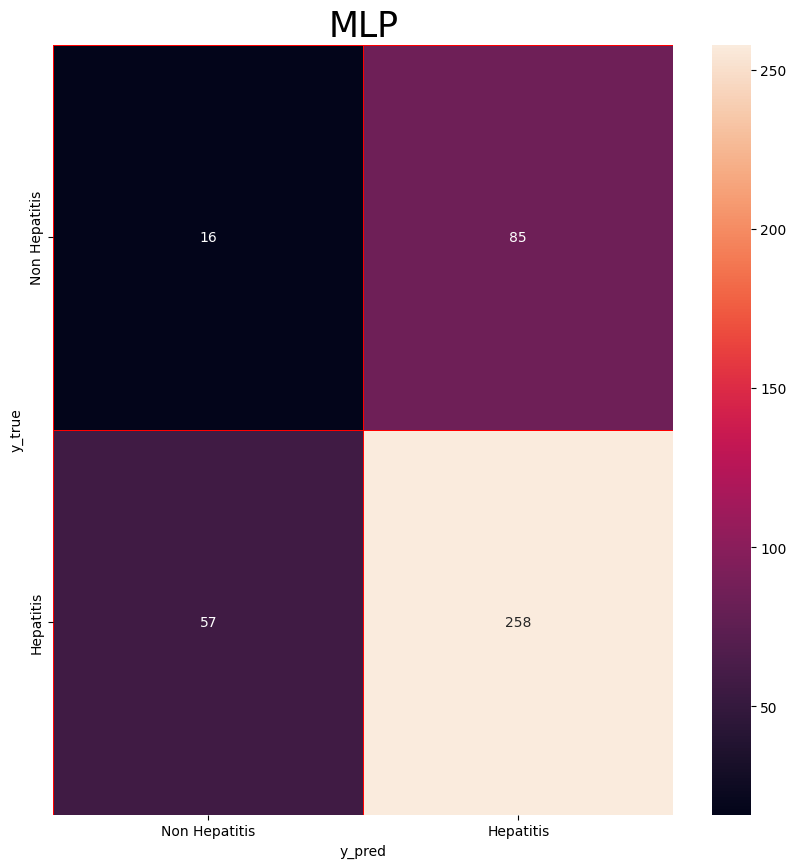

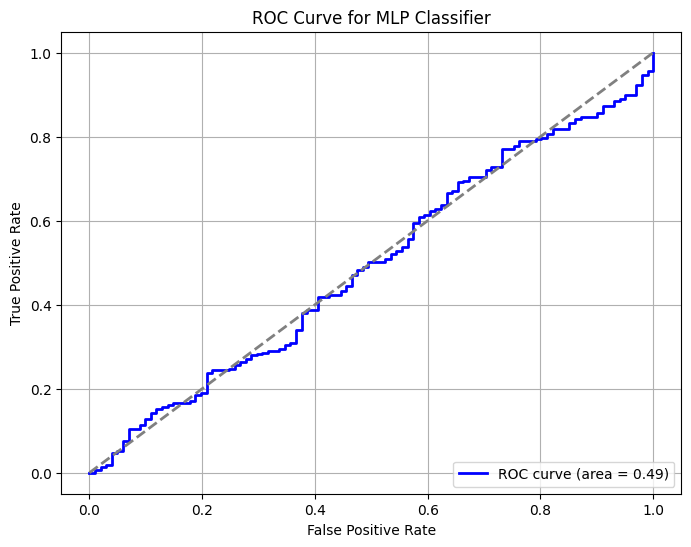

In [146]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

clf = MLPClassifier(random_state=42)
params_MLP = {
        "hidden_layer_sizes":[64,128,256],
        "activation":["identity", "logistic", "tanh", "relu"],
        'solver': ["lbfgs", "sgd", "adam"],
        "learning_rate":["constant", "invscaling", "adaptive"],
        'max_iter': [100,200],
        "warm_start":[True]
}

model_MLP = GridSearchCV(clf, param_grid=params_MLP, cv=3, n_jobs=-1)
model_MLP.fit(X_train, y_train)

print("Best params: "+str(model_MLP.best_params_))
print("Best Score: "+str(model_MLP.best_score_)+'\n')

scores = pd.DataFrame(model_MLP.cv_results_)
scores.sort_values(by="rank_test_score")

y_train_pred_MLP = model_MLP.predict(X_train)
y_test_pred_MLP = model_MLP.predict(X_test)

print(classification_report(y_test, y_test_pred_MLP))

# Macierz pomyłek
confusion(y_test, y_test_pred_MLP, "MLP")

# Wykres ROC
y_test_proba_MLP = model_MLP.predict_proba(X_test)  # Predykcja prawdopodobieństw
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba_MLP[:, 1], pos_label=1)  # Dostosuj 'pos_label' do swojej klasy
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLP Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()
